In [61]:
import tensorflow as tf
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [62]:
tf.__version__

'2.8.0'

In [63]:
(xtrain,ytrain), (xtest, ytest) = tf.keras.datasets.boston_housing.load_data()

In [64]:
xtest.shape

(102, 13)

In [65]:
ytest.shape

(102,)

Build a model

In [66]:
norm  = tf.keras.layers.Normalization()
norm.adapt(xtrain)

In [67]:
model = tf.keras.models.Sequential()
model.add(norm)
model.add(tf.keras.layers.Dense(32, input_shape=(13,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 32)                448       
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,564
Trainable params: 1,537
Non-trainable params: 27
_________________________________________________________________


compile the model

In [68]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = ['mean_absolute_error'],
    metrics=['accuracy']
)

train model

In [69]:
es = tf.keras.callbacks.EarlyStopping(patience=5)

In [70]:
history = model.fit(
    x = xtrain,
    y = ytrain,
    epochs = 100,
    validation_data = [xtest, ytest],
    callbacks=[es]
)

Epoch 1/100
13/13 [==============================] - 1s 24ms/step - loss: 21.9065 - accuracy: 0.0000e+00 - val_loss: 22.2546 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 21.2688 - accuracy: 0.0000e+00 - val_loss: 21.5014 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 20.4539 - accuracy: 0.0000e+00 - val_loss: 20.5373 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 19.4006 - accuracy: 0.0000e+00 - val_loss: 19.3356 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 18.0892 - accuracy: 0.0000e+00 - val_loss: 17.8982 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 16.5002 - accuracy: 0.0000e+00 - val_loss: 16.3059 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 14.6458 - accuracy: 

In [71]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,21.906525,0.0,22.254639,0.0,0
1,21.268753,0.0,21.501354,0.0,1
2,20.453852,0.0,20.537304,0.0,2
3,19.400623,0.0,19.335642,0.0,3
4,18.089235,0.0,17.898167,0.0,4


In [72]:
fig = px.line(df, x='epoch',y='loss')
fig.show()

In [73]:
def plot_loss(df):
  plt.plot(df['loss'], label='training loss')
  plt.plot(df['val_loss'], label='validation loss')
  plt.ylim([0,10])
  plt.xlabel('epoch')
  plt.ylabel('Error (MAE)')
  plt.legend()
  plt.grid(True)

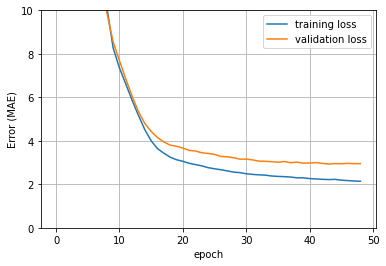

In [74]:
plot_loss(df)

save model

In [75]:
model.save('boston_house_pricing')

INFO:tensorflow:Assets written to: boston_house_pricing\assets


In [76]:
model.save('boston.hs', save_format='hs')

INFO:tensorflow:Assets written to: boston.hs\assets


load model

In [77]:
tf.keras.models.load_model('boston_house_pricing')

prediction

In [78]:
ypred = model.predict(xtest)

{'whiskers': [<matplotlib.lines.Line2D at 0xf616519310>,
 'caps': [<matplotlib.lines.Line2D at 0xf616519970>,
 'boxes': [<matplotlib.lines.Line2D at 0xf616509e80>],
 'medians': [<matplotlib.lines.Line2D at 0xf6165240d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xf616524460>],
 'means': []}

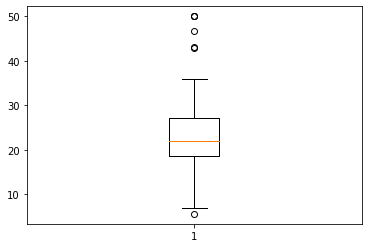

In [79]:
plt.